In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-price-edatime-series-analysis/Stocks Price EDA(Time Series Analysis).ipynb
/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/CL_data.csv
/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/FDX_data.csv
/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/AMAT_data.csv
/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/GLW_data.csv
/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/ANSS_data.csv
/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/DVN_data.csv
/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/CBG_data.csv
/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/TSS_data.csv
/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/JEC_data.csv
/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/VRTX_data.csv
/kaggle/input/stock-price-edatime-series-analysis/ind

In [2]:
company_list=["AAPL_data.csv","GOOG_data.csv","MSFT_data.csv","AMZN_data.csv"]
path="/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr"
all_data=pd.DataFrame()
for file in company_list:
    stocks=pd.read_csv(path+"/"+file)
    all_data=pd.concat([all_data,stocks])

In [3]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [5]:
all_data["date"]=pd.to_datetime(all_data["date"])

In [6]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [7]:
tech_list=all_data.Name.unique()
tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

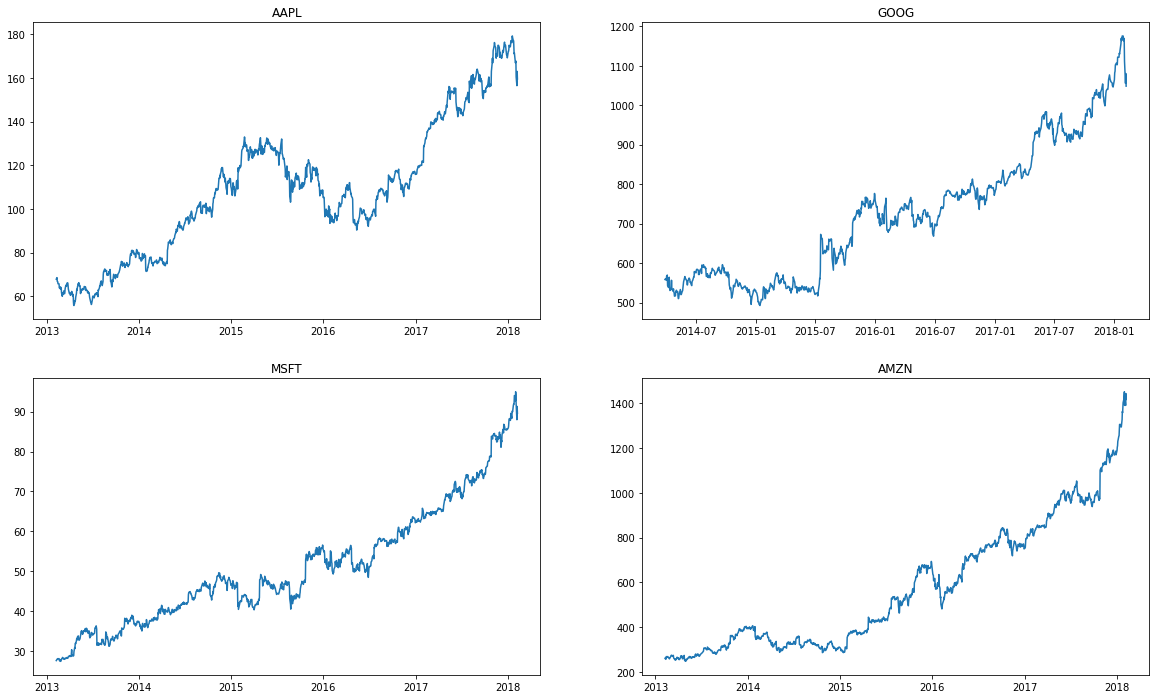

In [8]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data["Name"]==company]
    plt.plot(df.date,df.close)
    plt.title(company)

In [9]:
import plotly.express as px

In [10]:
for company in tech_list:
    df=all_data[all_data["Name"]==company]
    fig=px.line(df,x="date",y="volume",title=company)
    fig.show()

# **Analyse daily price change in stock**

****

In [11]:
apple=pd.read_csv("/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/AAPL_data.csv")
apple

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [12]:
apple["Daily_price_change"]=apple.close-apple.open

In [13]:
apple["1day_%_return"]=(apple.Daily_price_change/apple.close)*100

In [14]:
apple

,date,open,high,low,close,volume,Name,Daily_price_change,1day_%_return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.6150,0.366551
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-5.5000,-3.426791
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.6100,-1.667838
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,8.2000,5.029749


In [15]:
fig=px.line(apple,x="date",y="1day_%_return")
fig.show()

# Analyse monthly mean of close feature

In [16]:
df2=apple.copy()

In [17]:
df2["date"]=pd.to_datetime(df2["date"])

In [18]:
df2.set_index("date", inplace=True)

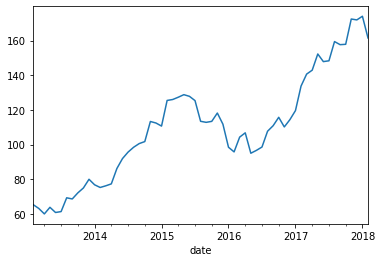

In [19]:
df2["close"].resample("M").mean().plot()
plt.show()

# Whether stock prices are correlated or not

In [20]:
aapl=pd.read_csv("/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/AAPL_data.csv")
aapl

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [21]:
goog=pd.read_csv("/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/GOOG_data.csv")
goog

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG
...,...,...,...,...,...,...,...
970,2018-02-01,1162.610,1174.00,1157.52,1167.70,2412114,GOOG
971,2018-02-02,1122.000,1123.07,1107.28,1111.90,4857943,GOOG
972,2018-02-05,1090.600,1110.00,1052.03,1055.80,3798301,GOOG
973,2018-02-06,1027.180,1081.71,1023.14,1080.60,3447956,GOOG


In [22]:
msft=pd.read_csv("/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/MSFT_data.csv")
msft

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
1,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
2,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
3,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
4,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...
1254,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT


In [23]:
amzn=pd.read_csv("/kaggle/input/stock-price-edatime-series-analysis/individual_stocks_5yr/AMZN_data.csv")
amzn

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN
...,...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN


In [24]:
close=pd.DataFrame()

In [25]:
close["aapl"]=aapl["close"]
close["goog"]=goog["close"]
close["msft"]=msft["close"]
close["amzn"]=amzn["close"]

In [26]:
close

,aapl,goog,msft,amzn
0,67.8542,558.46,27.55,261.95
1,68.5614,559.99,27.86,257.21
2,66.8428,556.97,27.88,258.70
3,66.7156,567.16,28.03,269.47
4,66.6556,567.00,28.04,269.24
...,...,...,...,...
1254,167.7800,NaN,94.26,1390.00
1255,160.5000,NaN,91.78,1429.95
1256,156.4900,NaN,88.00,1390.00
1257,163.0300,NaN,91.33,1442.84


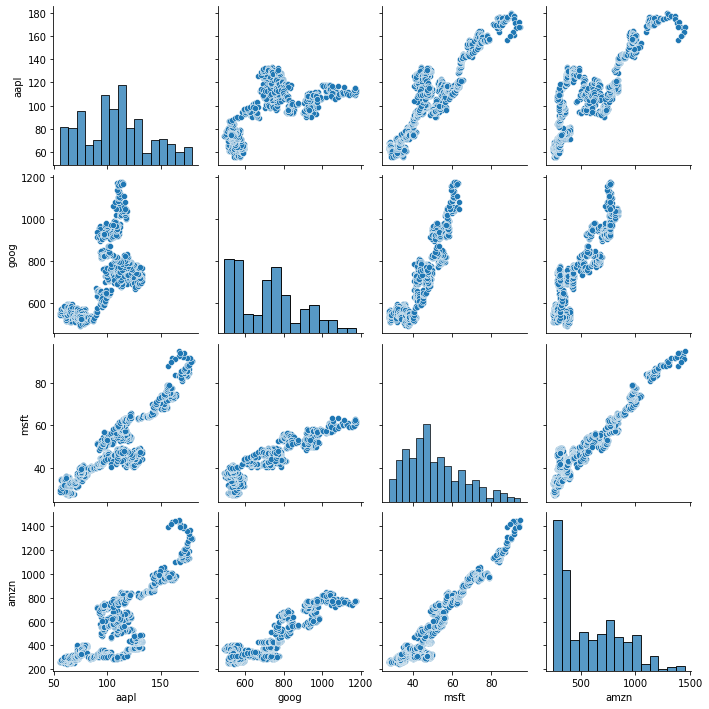

In [27]:
sns.pairplot(data=close)

<AxesSubplot:>

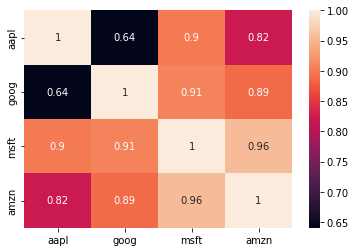

In [28]:
sns.heatmap(close.corr(),annot=True)

# Analyze daily return of each stock and their correlation

In [29]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [30]:
data=pd.DataFrame()

In [31]:
data["aapl_change"]=((aapl["close"]-aapl["open"])/aapl["close"])*100
data["goog_change"]=((goog["close"]-goog["open"])/goog["close"])*100
data["msft_change"]=((msft["close"]-msft["open"])/msft["close"])*100
data["amzn_change"]=((amzn["close"]-amzn["open"])/amzn["close"])*100

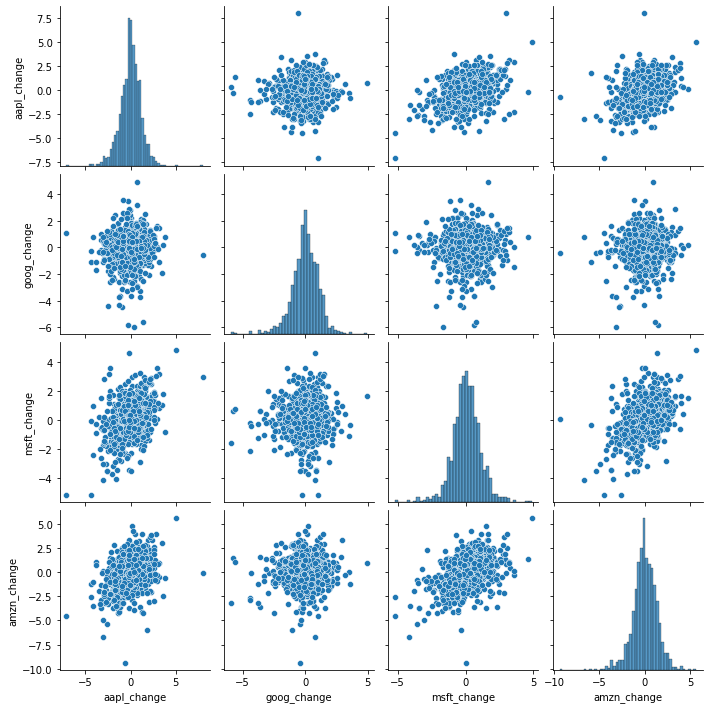

In [32]:
sns.pairplot(data=data)

<AxesSubplot:>

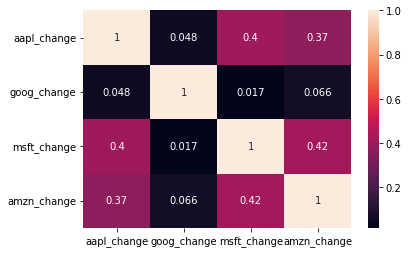

In [33]:
sns.heatmap(data.corr(),annot=True)

# Value at risk analysis for tech companies

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='aapl_change', ylabel='Density'>

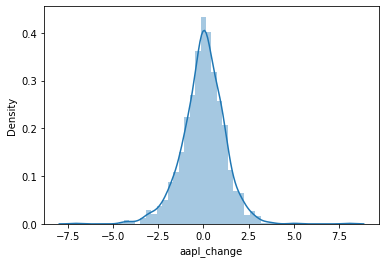

In [34]:
sns.distplot(data["aapl_change"])

In [35]:
data["aapl_change"].std()

1.1871377131421237

In [36]:
data["aapl_change"].std()*2

2.3742754262842474

In [37]:
data["aapl_change"].std()*3

3.561413139426371